# OCEAN Personality Insights For Twitter Tweets

## Import required Packages
**Requirements:** 

- pip install ConfigParser
- pip install tweepy
- pip install ibm-watson

In [16]:

import configparser
import os
import tweepy as tw
import pandas as pd
import re
from ibm_watson import PersonalityInsightsV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from matplotlib import pyplot as plt
import seaborn as sns

handle = 'imVkohli' # Person's twitter handle here

## Twitter and IBM Cloud Configuration for API Calls

#### twitter.properties format:


    [twitter]
    accesstoken=XXXXXXXXX
    accesstokensecret=XXXXXXXXXXX
    apikey=XXXXXXXXXXXXX
    apisecretkey=XXXXXXXXXXXXXXXXXXXXXX
    apikeyibm = XXXXXXXXXXXXXXXXXXXXXXXX
    urlibm = XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

**Get your Access for twitter developer access from [HERE](http://developer.twitter.com/).**<br>
**Get your IBM keys from [HERE](https://cloud.ibm.com/services/personality-insights)**<br>
**Both accounts are FREE of COST**

In [24]:
config = configparser.RawConfigParser()
config.read('twitter.properties')
accesstoken = config.get('twitter','accesstoken')
accesstokensecret = config.get('twitter','accesstokensecret')
apikey = config.get('twitter','apikey')
apisecretkey = config.get('twitter','apisecretkey')
apikeyibm = config.get('twitter','apikeyibm')
urlibm = config.get('twitter','urlibm')

In [25]:
auth = tw.OAuthHandler(apikey,apisecretkey)
auth.set_access_token(accesstoken,accesstokensecret)
api = tw.API(auth,wait_on_rate_limit=True)

In [26]:
res = api.user_timeline(screen_name=handle, count=100, include_rts=True)
tweets = [tweet.text for tweet in res]

In [27]:
def clean(text):
    text = re.sub("RT @[\w]*:","",text)
    text = re.sub("@[\w]*","",text)
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    text = re.sub("\n","",text)
    return text


In [28]:
cleaned_tweets = []
for i in tweets:
    cleaned_tweets.append(clean(i))

In [29]:
cleaned_tweet_blob = "".join(cleaned_tweets)

In [30]:
authenticator = IAMAuthenticator(apikeyibm)
personality_insights = PersonalityInsightsV3(
        version='2017-10-13', 
        authenticator=authenticator
)
personality_insights.set_service_url(urlibm)

In [31]:
profile = personality_insights.profile(cleaned_tweet_blob, accept='application/json').get_result()

In [32]:
for personality in profile['personality']:
    print(personality['name'], personality['percentile'])

Openness 0.37432858447056805
Conscientiousness 0.9603816848542818
Extraversion 0.5550833252573109
Agreeableness 0.8136426752973973
Emotional range 0.19100792127126187


In [33]:
personality = profile['personality']
result = {per['name']:per['percentile'] for per in personality}
df = pd.DataFrame.from_dict(result, orient='index')
df.reset_index(inplace=True)
df.columns = ['Personality', 'percentile']

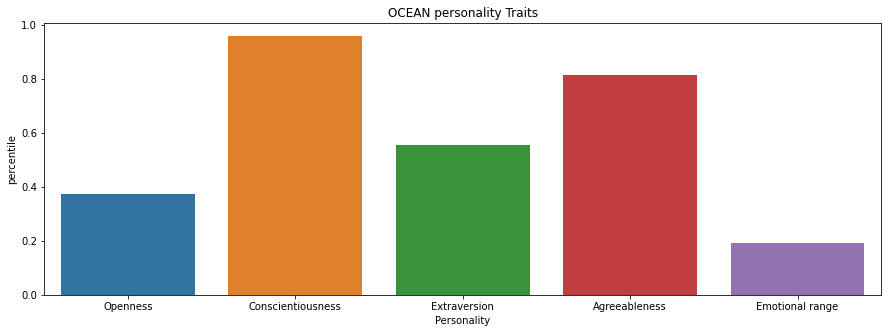

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(y='percentile', x='Personality', data=df).set_title('OCEAN personality Traits')
plt.show()